# Natural Language Processing (NLP) 
 
 **We will look at some specific techniques used in NLP tasks**
  

**NLP** is one of the areas of artificial intelligence that works with the analysis,  
understanding and generation of living languages in order to interact with computers  
using natural languages instead of computer ones.

## NLP Application
- Machine translation (Google Translate)
- Natural language generation
- Search engines
- Sentiment Analysis
- Chat bots
- etc.

# Data Cleaning

During **Data Cleaning**, we remove:
- special signs 
- symbols 
- punctuation 
- html <> tags

from the source data, which do not contain any useful information for the model and only add noise to the data.

**Data cleaning code example bellow:**

In [10]:
import re

CLEANER = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')


def text_clean(raw_text):
    """To clear text from HTML tags"""

    clean_text = re.sub(CLEANER, '', raw_text)
    clean_text = clean_text.replace(';', '.')

    return clean_text


text = '<p>Здравствуйте!</p> <p>Наша семья ищет няню для мальчика 1 годик. <br />' \
       'Мы будем рады видеть жизнерадостного и ответственного человека, ' \
       'который готов проводить с ребенком целый день и останется с нами хотябы до лета !<br />' \
       '<i>Я надеюсь, пройдут плавно.</i></p>'

clean_text = text_clean(text)

print(f'Raw text -> {text}\n\n')
print(f'Cleaned text -> {clean_text}')

Raw text -> <p>Здравствуйте!</p> <p>Наша семья ищет няню для мальчика 1 годик. <br />Мы будем рады видеть жизнерадостного и ответственного человека, который готов проводить с ребенком целый день и останется с нами хотябы до лета !<br /><i>Я надеюсь, пройдут плавно.</i></p>


Cleaned text -> Здравствуйте! Наша семья ищет няню для мальчика 1 годик. Мы будем рады видеть жизнерадостного и ответственного человека, который готов проводить с ребенком целый день и останется с нами хотябы до лета !Я надеюсь, пройдут плавно.


# Preprocessing of Data

Changing the case:

One of the simplest forms of text preprocessing is the translation of all text characters into lowercase.
 
 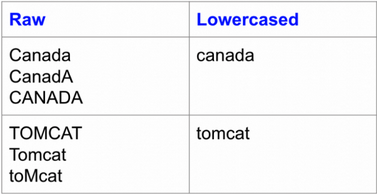  
 
**example code bellow:**

In [11]:
clean_text = clean_text.lower()

print(clean_text)

здравствуйте! наша семья ищет няню для мальчика 1 годик. мы будем рады видеть жизнерадостного и ответственного человека, который готов проводить с ребенком целый день и останется с нами хотябы до лета !я надеюсь, пройдут плавно.


# Tokenization:

is the process of splitting a text document into separate words, which are called tokens.

**example code bellow:**

In [12]:
import nltk


def tokenize_words(raw_text):
    """To tokenize text by first removing
     punctuation marks and extra spaces"""

    marks_removed = re.sub(r'[^\w\s]', '',  raw_text)
    cleaned_text = re.sub(" +", " ", marks_removed)

    return nltk.word_tokenize(cleaned_text)


tokens = tokenize_words(clean_text)

print(tokens)

['здравствуйте', 'наша', 'семья', 'ищет', 'няню', 'для', 'мальчика', '1', 'годик', 'мы', 'будем', 'рады', 'видеть', 'жизнерадостного', 'и', 'ответственного', 'человека', 'который', 'готов', 'проводить', 'с', 'ребенком', 'целый', 'день', 'и', 'останется', 'с', 'нами', 'хотябы', 'до', 'лета', 'я', 'надеюсь', 'пройдут', 'плавно']


**In this example, when tokenizing, we also remove unnecessary punctuation marks**

# Deleting stop words

Stop words are frequently used words that do not add any additional information to the text.  
In **Russian**, these are prepositions and particles, such as **"на", "в", "под", "и"** etc.  

**example code bellow:**

In [13]:
# nltk.download('stopwords')
from nltk.corpus import stopwords


def remove_stop_words(raw_list):
    """To remove stop words from the list
    (prepositions, particles, etc.)"""

    stop_words = stopwords.words('russian')
    filtered_list = []

    for word in raw_list:
        if word not in stop_words:
            filtered_list.append(word)

    return filtered_list


clean_tokens = remove_stop_words(tokens)
print(clean_tokens)

['здравствуйте', 'наша', 'семья', 'ищет', 'няню', 'мальчика', '1', 'годик', 'будем', 'рады', 'видеть', 'жизнерадостного', 'ответственного', 'человека', 'который', 'готов', 'проводить', 'ребенком', 'целый', 'день', 'останется', 'нами', 'хотябы', 'лета', 'надеюсь', 'пройдут', 'плавно']


# Stemmization and Lemmatization

- **Stemmization** is the process of bringing a word to its root/base.


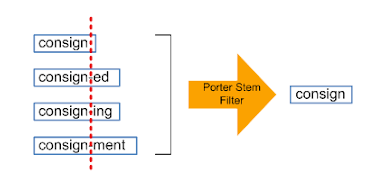

- **Lemmatization** is similar to stemmization in that it brings a word to its initial form,  
  but with one difference: in this case, the root of the word will be a word existing in the language.  
  For example, the word "caring" will stop in "care", and not "car", as in stemmization.
  
  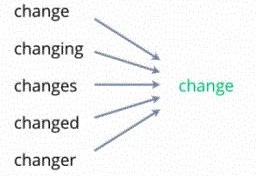

## For this case we will use lemmatization for morphological analysis of Russian words
 
**example code bellow:**

In [14]:
import pymorphy2 # -> Importing a library for analyzing Russian words


def morph_analyse(raw_list):
    """For morphological analysis of words"""

    morph = pymorphy2.MorphAnalyzer()
    morph_list = []

    for word in raw_list:
        parsed_word = morph.parse(word)[0].normal_form
        morph_list.append(parsed_word)


    return morph_list


result = morph_analyse(clean_tokens)
print('Before:\n', clean_tokens)
print()
print('After:\n', result)

Before:
 ['здравствуйте', 'наша', 'семья', 'ищет', 'няню', 'мальчика', '1', 'годик', 'будем', 'рады', 'видеть', 'жизнерадостного', 'ответственного', 'человека', 'который', 'готов', 'проводить', 'ребенком', 'целый', 'день', 'останется', 'нами', 'хотябы', 'лета', 'надеюсь', 'пройдут', 'плавно']

After:
 ['здравствуйте', 'наш', 'семья', 'искать', 'няня', 'мальчик', '1', 'годик', 'быть', 'рада', 'видеть', 'жизнерадостный', 'ответственный', 'человек', 'который', 'готовый', 'проводить', 'ребёнок', 'целый', 'день', 'остаться', 'мы', 'хотяб', 'лето', 'надеяться', 'пройти', 'плавно']


# Text summarization

**Summarization** can be defined as the automatic creation of a brief content (title, summary, annotation) of the source text




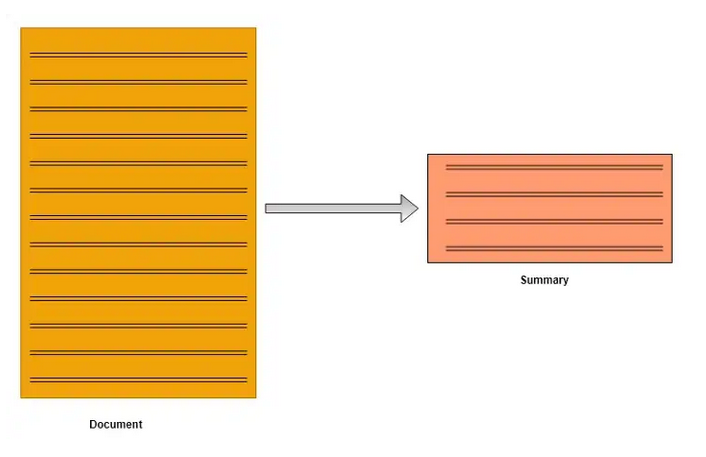

## Extractive Summarization:  
Extractive methods attempt to summarize articles by selecting a subset of words that retain the most important points.

This approach weights the important part of sentences and uses the same to form the summary. Different algorithm and techniques are used to define weights for the sentences and further rank them based on importance and similarity among each other.

**Input document → sentences similarity → weight sentences → select sentences with higher rank.**

## Next, Below is our code flow to generate summarize text

Input article → split into sentences → remove stop words → build a similarity matrix → generate rank based on matrix → pick top N sentences for summary.

- We divide each sentence by tokens and each word inside the sentences

In [23]:
import numpy as np
import networkx as nx
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.cluster.util import cosine_distance


def tokenize_text(raw_text):
    """To tokenize all text by sentences
     and each sentence by words"""

    cleaned_text = text_clean(raw_text)
    sentence_tokens = sent_tokenize(cleaned_text)

    for i in range(len(sentence_tokens)):
        sentence = sentence_tokens[i]
        token_words = tokenize_words(sentence)
        sentence_tokens[i] = token_words

    return sentence_tokens


def sentence_similarity(sent1, sent2, stop_words):
    """To vectorize two sentences"""

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    for word in sent1:
        if word in stop_words:
            continue

        vector1[all_words.index(word)] += 1

    for word in sent2:
        if word in stop_words:
            continue

        vector2[all_words.index(word)] += 1

    return 1 - cosine_distance(vector1, vector2)


def build_similarity_matrix(sentences, stop_words):
    """This is where we will be using cosine 
    similarity to find similarity between sentences."""

    sim_matrix = np.zeros((
        len(sentences),
        len(sentences)
    ))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2:
                continue

            sim_matrix[idx1][idx2] = sentence_similarity(
                sentences[idx1],
                sentences[idx2],
                stop_words
            )

    return sim_matrix


def generate_summary(text, top_n=5):
    """To get the summarized text,
    indicate the number of required sentences"""

    stop_words = stopwords.words('russian')
    summarize_text = []

    sentences = tokenize_text(text)
    similarity_martix = build_similarity_matrix(sentences, stop_words)
    similarity_graph = nx.from_numpy_array(similarity_martix)
    scores = nx.pagerank(similarity_graph)

    ranked_sentence = sorted(
        ((scores[i], s) for i, s in enumerate(sentences)),
        reverse=True
    )

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    return ". ".join(summarize_text)

In [24]:
text_raw = '<p><strong>Требования:</strong></p> <ul> <li>Опыт работы на аналогичной позиции – от 1 года;' \
           '</li> <li>Опыт ведения коммерческой базы предприятия;</li> <li>Активная жизненная позиция‚ ' \
           'грамотная речь‚ коммуникабельность;</li> <li>Высокая самоорганизация, лидерские качества, ' \
           'аналитический склад ума;</li> <li>Уверенное пользование 1С</li> </ul> <p><strong>Обязанности:' \
           '</strong></p> <ul> <li>Самостоятельное ведение бухгалтерского, налогового учета в полном' \
           ' объеме в соответствии с требованиями законодательства КР;</li> <li>Формирование и сдача ' \
           'бухгалтерской, налоговой, статистической отчетности;</li> <li>Проверка и подписание всей ' \
           'первичной документации (кассовые документы. авансовые отчеты, инвентаризации, доверенности' \
           ' и тд);</li> <li>Формирование прихода ТМЦ в базу 1С, перемещение по складам;</li> <li>' \
           'Ведение учета движения ТМЦ по документам поступления, отгрузки, перемещения в программе 1С;' \
           '</li> <li>Ценообразование товаров;</li> <li>Учет и контроль дебиторской и кредиторской' \
           ' задолженности;</li> <li>Ведение кассовых и банковских операций, проверка авансовых' \
           ' отчетов, ведение учета материальных ценностей;</li> <li>Контроль за основными и иными' \
           ' материальными ценностями организации;</li> <li>Контроль и участие в процессе инвентаризации' \
           ' материального имущества; выявление итогов инвентаризации и анализ недостачи;</li> <li>' \
           'Анализ финансово-хозяйственной деятельности предприятия;</li> <li>Учет труда и начисление' \
           ' заработной платы сотрудникам, своевременное отражение всех операций в бухгалтерском учете;' \
           '</li> <li>Формирование финансовой отчетности;</li> <li>Выполнение актов -сверок с ' \
           'контрагентами</li> <li>Интернет-банкинг и взаимодействие с банками;</li> <li>Ведение' \
           ' кадровой документации;</li> <li>Выполнение отдельных поручений руководителя;</li> ' \
           '</ul> <p><strong>Условия:</strong></p> <ul> <li>Официальное трудоустройство по ТК;</li>' \
           ' <li>Местонахождение офиса - центр города</li> </ul> <p> </p>'

In [28]:
processed_text = generate_summary(text_raw, 7)

print('Before:\n' + text_raw)
print()
print('After:\n' + processed_text)

Before:
<p><strong>Требования:</strong></p> <ul> <li>Опыт работы на аналогичной позиции – от 1 года;</li> <li>Опыт ведения коммерческой базы предприятия;</li> <li>Активная жизненная позиция‚ грамотная речь‚ коммуникабельность;</li> <li>Высокая самоорганизация, лидерские качества, аналитический склад ума;</li> <li>Уверенное пользование 1С</li> </ul> <p><strong>Обязанности:</strong></p> <ul> <li>Самостоятельное ведение бухгалтерского, налогового учета в полном объеме в соответствии с требованиями законодательства КР;</li> <li>Формирование и сдача бухгалтерской, налоговой, статистической отчетности;</li> <li>Проверка и подписание всей первичной документации (кассовые документы. авансовые отчеты, инвентаризации, доверенности и тд);</li> <li>Формирование прихода ТМЦ в базу 1С, перемещение по складам;</li> <li>Ведение учета движения ТМЦ по документам поступления, отгрузки, перемещения в программе 1С;</li> <li>Ценообразование товаров;</li> <li>Учет и контроль дебиторской и кредиторской задолж

# Sentiment Analysis

Let's create a sentiment analysis model using the example  
of job descriptions from our dataset to predict spezialization.

## 1. Reading and researching data

In [30]:
import pandas as pd


data = pd.read_csv('vacancies.csv')
data

,name,area,employer,salary_from,salary_to,currency,description,specialization,profarea,schedule,experience
0,Главный герой рекламы hh.ru,Москва,HeadHunter,NaN,500000.0,RUR,<p>В прошлом году тысячи наших пользователей р...,Розничная торговля,Продажи,Полный день,Нет опыта
1,Учитель в школу программирования и робототехники,Астана,Нурали,150000.0,250000.0,KZT,<strong>Обязанности:</strong> <ul> <li><em>Про...,Гуманитарные науки,"Наука, образование",Полный день,От 1 года до 3 лет
2,Кладовщик Вайлдберриз,Минск,Вайлдберриз,2000.0,NaN,BYR,<p><strong>Обязанности:</strong></p> <ul> <li>...,Складское хозяйство,"Транспорт, логистика",Полный день,Нет опыта
3,Техничка (техник) / уборщик,Алматы,Muberry,90000.0,120000.0,KZT,<strong>Обязанности:</strong> <ul> <li>поддерж...,Розничная торговля,Продажи,Сменный график,Нет опыта
4,"Администратор интернет-магазина, менеджер по р...",Минск,БП ритейл,800.0,1000.0,BYR,<p>ООО “БП ритейл” ищет менеджера интернет маг...,Делопроизводство,Административный персонал,Полный день,Нет опыта
...,...,...,...,...,...,...,...,...,...,...,...
5136,Специалист службы безопасности,Москва,"Запад,ООО",80000.0,NaN,RUR,<p><strong>Задачи:</strong></p> <p>Организация...,Имущественная безопасность,Безопасность,Полный день,От 3 до 6 лет
5137,Вахтер,Красноярск,Альфа,30000.0,NaN,RUR,<strong>Обязанности:</strong> <ul> <li>Присутс...,Розничная торговля,Продажи,Полный день,От 3 до 6 лет
5138,Операционный директор,Москва,Громова Анастасия Андреевна,200000.0,1000000.0,RUR,"<p><em>Привет, давай знакомиться! Меня зовут А...",Другое,Высший менеджмент,Удаленная работа,От 3 до 6 лет
5139,Администратор медицинского центра,Пенза,Медцентр-УЗИ,27000.0,30000.0,RUR,<p><strong>Требования:</strong></p> <ul> <li>Н...,Администрация,"Спортивные клубы, фитнес, салоны красоты",Сменный график,Нет опыта


In [31]:
data[['description', 'profarea']]

,description,profarea
0,<p>В прошлом году тысячи наших пользователей р...,Продажи
1,<strong>Обязанности:</strong> <ul> <li><em>Про...,"Наука, образование"
2,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Транспорт, логистика"
3,<strong>Обязанности:</strong> <ul> <li>поддерж...,Продажи
4,<p>ООО “БП ритейл” ищет менеджера интернет маг...,Административный персонал
...,...,...
5136,<p><strong>Задачи:</strong></p> <p>Организация...,Безопасность
5137,<strong>Обязанности:</strong> <ul> <li>Присутс...,Продажи
5138,"<p><em>Привет, давай знакомиться! Меня зовут А...",Высший менеджмент
5139,<p><strong>Требования:</strong></p> <ul> <li>Н...,"Спортивные клубы, фитнес, салоны красоты"


## 2. Data Preprocessing

- At this stage, we perform all the steps of cleaning and preprocessing the data. We use lemmatization, not thematization, because in the process of testing the results of both cases, lemmatization gives better results than stemmization.

In [32]:
import data_proc


data['preprocessed_description'] = data['description'].apply(lambda text: data_proc.text_preprocessing(text))
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kalyibek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalyibek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,name,area,employer,salary_from,salary_to,currency,description,specialization,profarea,schedule,experience,preprocessed_description
0,Главный герой рекламы hh.ru,Москва,HeadHunter,NaN,500000.0,RUR,<p>В прошлом году тысячи наших пользователей р...,Розничная торговля,Продажи,Полный день,Нет опыта,прошлый год тысяча наш пользователь рассказать...
1,Учитель в школу программирования и робототехники,Астана,Нурали,150000.0,250000.0,KZT,<strong>Обязанности:</strong> <ul> <li><em>Про...,Гуманитарные науки,"Наука, образование",Полный день,От 1 года до 3 лет,обязанность проведение занятие согласно график...
2,Кладовщик Вайлдберриз,Минск,Вайлдберриз,2000.0,NaN,BYR,<p><strong>Обязанности:</strong></p> <ul> <li>...,Складское хозяйство,"Транспорт, логистика",Полный день,Нет опыта,обязанность упаковка товар сортировка товар тр...
3,Техничка (техник) / уборщик,Алматы,Muberry,90000.0,120000.0,KZT,<strong>Обязанности:</strong> <ul> <li>поддерж...,Розничная торговля,Продажи,Сменный график,Нет опыта,обязанность поддержание чистота помещение выно...
4,"Администратор интернет-магазина, менеджер по р...",Минск,БП ритейл,800.0,1000.0,BYR,<p>ООО “БП ритейл” ищет менеджера интернет маг...,Делопроизводство,Административный персонал,Полный день,Нет опыта,ооо бп ритейл искать менеджер интернет магазин...
...,...,...,...,...,...,...,...,...,...,...,...,...
5136,Специалист службы безопасности,Москва,"Запад,ООО",80000.0,NaN,RUR,<p><strong>Задачи:</strong></p> <p>Организация...,Имущественная безопасность,Безопасность,Полный день,От 3 до 6 лет,задача организация проверка потенциальный конт...
5137,Вахтер,Красноярск,Альфа,30000.0,NaN,RUR,<strong>Обязанности:</strong> <ul> <li>Присутс...,Розничная торговля,Продажи,Полный день,От 3 до 6 лет,обязанность присутствие рабочий место постоянн...
5138,Операционный директор,Москва,Громова Анастасия Андреевна,200000.0,1000000.0,RUR,"<p><em>Привет, давай знакомиться! Меня зовут А...",Другое,Высший менеджмент,Удаленная работа,От 3 до 6 лет,привет давать знакомиться звать анастасия гром...
5139,Администратор медицинского центра,Пенза,Медцентр-УЗИ,27000.0,30000.0,RUR,<p><strong>Требования:</strong></p> <ul> <li>Н...,Администрация,"Спортивные клубы, фитнес, салоны красоты",Сменный график,Нет опыта,требование необходимый навык работа компьютер ...


### let's look at the processed data and specializations

In [33]:
data[['description', 'profarea', 'preprocessed_description']]

,description,profarea,preprocessed_description
0,<p>В прошлом году тысячи наших пользователей р...,Продажи,прошлый год тысяча наш пользователь рассказать...
1,<strong>Обязанности:</strong> <ul> <li><em>Про...,"Наука, образование",обязанность проведение занятие согласно график...
2,<p><strong>Обязанности:</strong></p> <ul> <li>...,"Транспорт, логистика",обязанность упаковка товар сортировка товар тр...
3,<strong>Обязанности:</strong> <ul> <li>поддерж...,Продажи,обязанность поддержание чистота помещение выно...
4,<p>ООО “БП ритейл” ищет менеджера интернет маг...,Административный персонал,ооо бп ритейл искать менеджер интернет магазин...
...,...,...,...
5136,<p><strong>Задачи:</strong></p> <p>Организация...,Безопасность,задача организация проверка потенциальный конт...
5137,<strong>Обязанности:</strong> <ul> <li>Присутс...,Продажи,обязанность присутствие рабочий место постоянн...
5138,"<p><em>Привет, давай знакомиться! Меня зовут А...",Высший менеджмент,привет давать знакомиться звать анастасия гром...
5139,<p><strong>Требования:</strong></p> <ul> <li>Н...,"Спортивные клубы, фитнес, салоны красоты",требование необходимый навык работа компьютер ...


## 3. Vectorizing Text



In [36]:
data_set = data.copy()

y = data_set['profarea']

data_set.drop(
    [
        'profarea',
        'name',
        'area',
        'employer',
        'salary_from',
        'salary_to',
        'currency',
        'specialization',
        'schedule',
        'experience',
    ], 
    axis=1, 
    inplace=True
)

- We divide the data set into train and test
- We use train_test_split from sklearn to split the data into train and test.

In [38]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data_set, y, test_size=0.3)

print('Train data ->', x_train.shape, y_train.shape)
print('Test data ->', x_test.shape, y_test.shape)

Train data -> (3598, 2) (3598,)
Test data -> (1543, 2) (1543,)


### BOW (Bag of words)


This is one of the simplest methods of text vectorization.  
In BOW logic, two sentences can be called the same if they contain the same set of words.

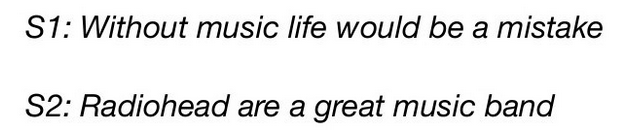

In NLP problems, each text sentence is called a document, and several such documents are called a corpus of texts.  

**BOW creates a dictionary of unique d words in the corpus. For example, the corpus in the image above consists of all the words of sentences S1 and S2.**  

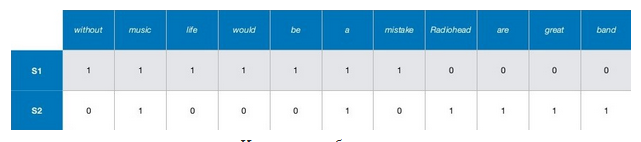

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Here we used min_df=10, 
# since we only needed those words, 
# which appear at least 10 times in the entire case.

vect = CountVectorizer(min_df=10)

x_train_text_bow = vect.fit_transform(x_train['preprocessed_description'])
x_test_text_bow = vect.transform(x_test['preprocessed_description'])

print('X train text BOW shape ->', x_train_text_bow.shape)
print('X test text BOW shape ->', x_test_text_bow.shape)

X train text BOW shape -> (3598, 3039)
X test text BOW shape -> (1543, 3039)


### TF-IDF  (Term Frequency)  

Term Frequency calculates the probability of finding a word in a document.  

#### TF(wi, dj) * IDF(wi, Dc)

TF-IDF — multiplication of TF and IDF values. More weight will be given to words that occur more often in the document than in the rest of the corpus.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF

vect = TfidfVectorizer(min_df=10)

x_train_text_tfidf = vect.fit_transform(x_train['preprocessed_description'])
x_test_text_tfidf = vect.transform(x_test['preprocessed_description'])

print('X train text TF-IDF shape ->', x_train_text_tfidf.shape)
print('X test text TF-IDF shape ->', x_test_text_tfidf.shape)

X train text TF-IDF shape -> (3598, 3039)
X test text TF-IDF shape -> (1543, 3039)


## 4. Creating ML classifiers

**Naive Bayes Classifier (Naive Bayes) with reviews encoded by BOW**

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf = MultinomialNB()
clf.fit(x_train_text_bow, y_train)

y_pred = clf.predict(x_test_text_bow)

print('Test accuracy ->', accuracy_score(y_test, y_pred))

Test accuracy -> 0.7090084251458199


Naive Bayes c BOW gives an accuracy of 70.9%.  
Let's try with TF-IDF.

**Naive Bayes Classifier (Naive Bayes) with reviews encoded by TF-IDF**

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf = MultinomialNB(alpha=1)
clf.fit(x_train_text_tfidf, y_train)

y_pred = clf.predict(x_test_text_tfidf)
print('Test accuracy ->', accuracy_score(y_test, y_pred))

Test accuracy -> 0.559300064808814


TF-IDF gives a worse result than BOW.  
Now let's try TF-IDF with a simple linear model, Logistic Regression.

**Logistic Regression with TF-IDF encoded reviews**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


clf = LogisticRegression(max_iter=4000)
clf.fit(x_train_text_tfidf, y_train)

y_pred = clf.predict(x_test_text_tfidf)
print('Test accuracy ->', accuracy_score(y_test, y_pred))

Test accuracy -> 0.7057679844458846


Logistic Regression with TF-IDF encoded reviews gives a better result than naive Bayem's TF-IDF — 70% accuracy.

# Results

We learned the basic NLP tasks and created simple ML models for sentiment analysis  
